In [107]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import os
import glob



def warp_image(image):
    shape=np.shape(image)
    zoomx=randn_skew_fast()#np.random.uniform(0.8,1.5)
    #zoomxy=np.random.uniform(-0.2,0.2)
    zoomy=randn_skew_fast()#np.random.uniform(0.8,1.5)#zoomx-zoomxy
    zoomxy=zoomx-zoomy
    extrapixelsx=(shape[0]-shape[0]*zoomx)/2
    extrapixelsy=(shape[1]-shape[1]*zoomy)/2
    movex=np.random.randn()*5#(-10,10)
    movey=np.random.randn()*5#(-10,10)
    posx=extrapixelsx+movex/(zoomx*2) 
    posy=extrapixelsy+movey/(zoomy*2)
    skewx=np.random.randn()*0.1#(-0.2,0.2)
    skewy=np.random.randn()*0.1#(-0.2,0.2)  ##take it easy with this!
    #print(f"zoomx {zoomx},zoomy {zoomy},movex {movex}, movey {movey}, skewx {skewx}, skewy {skewy}")
    M = np.float32([[zoomx,skewx,posx],[skewy,zoomy,posy]])
    image= cv2.warpAffine(image,M,(shape[1],shape[0]), borderMode=cv2.BORDER_REPLICATE)
    return image

def change_colors_image(image):
    image = image.astype(np.int32)
    sigma=20 ##difference between channels
    mu=np.random.randn()*50#(-100,100) #brightness
    rnds = np.round(np.random.normal(mu, sigma, 3)).astype(int)
    for i,r in enumerate(rnds):
        #if np.random.rand() < 1.1:
        #    image[:,:,i]=255-image[:,:,i]
            
        
        image[:,:,i]= np.clip(image[:,:,i] + r,0,254)

    return image.astype(np.uint8)

#https://stackoverflow.com/questions/36200913/generate-n-random-numbers-from-a-skew-normal-distribution-using-numpy?lq=1
def randn_skew_fast(N=1, alpha=9.0, loc=0.9, scale=0.4):
    sigma = alpha / np.sqrt(1.0 + alpha**2) 
    u0 = np.random.randn(N)
    v = np.random.randn(N)
    u1 = (sigma*u0 + np.sqrt(1.0 - sigma**2)*v) * scale
    u1[u0 < 0] *= -1
    u1 = u1 + loc
    return u1


In [4]:
cars = glob.glob('data/vehicles/**/*.png')
notcars = glob.glob('data/non-vehicles/**/*.png')
print(f"In our dataset we have {len(cars)} car images and {len(notcars)}")
#In our dataset we have 8792 car images and 8968
# This is rather similar, but lets create more!

In our dataset we have 8792 car images and 8968


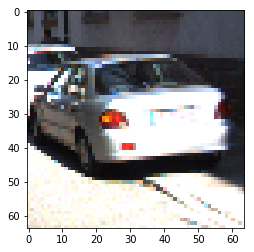

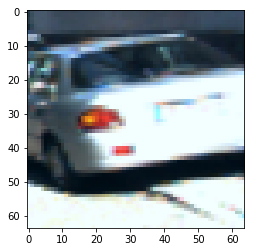

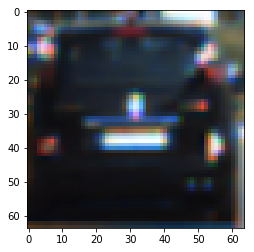

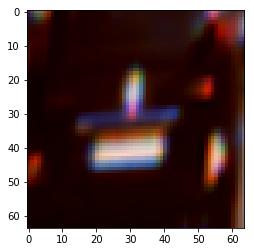

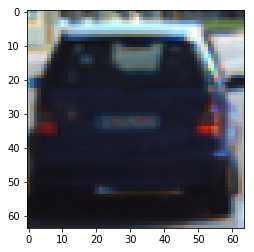

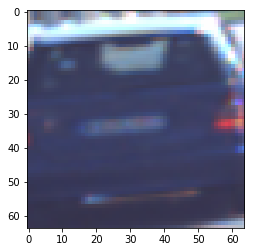

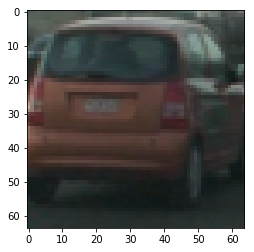

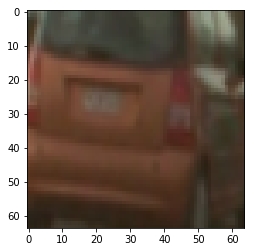

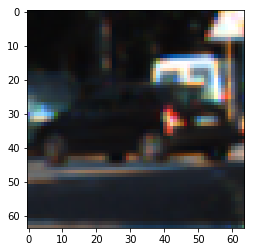

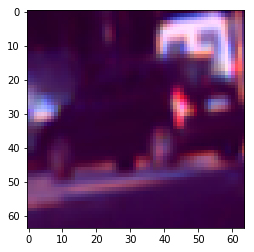

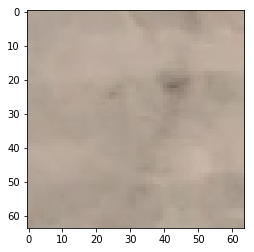

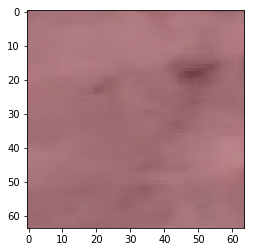

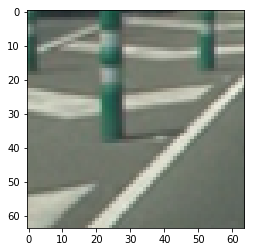

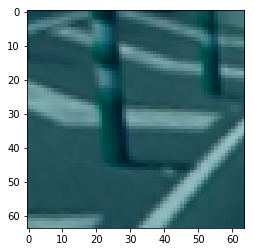

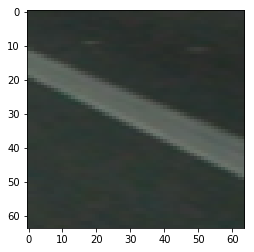

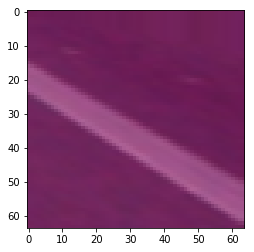

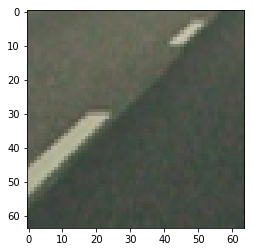

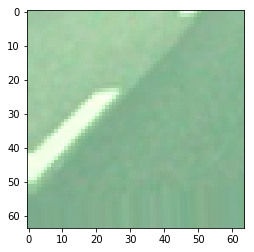

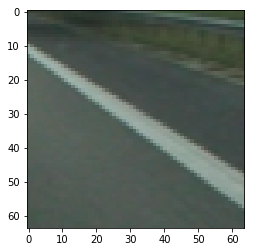

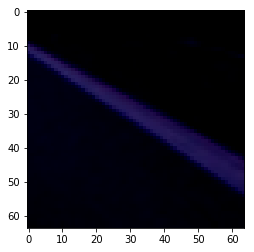

In [109]:
# First just try to agument a few
for i in range(5):
    image = cv2.imread(np.random.choice(cars))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    image = warp_image(image)
    image = change_colors_image(image) 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

for i in range(5):
    image = cv2.imread(np.random.choice(notcars))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    image = warp_image(image)
    image = change_colors_image(image) 
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [122]:
# First just try to agument a few
for i in range(len(notcars)+10000):
    image = cv2.imread(np.random.choice(cars))
    image = warp_image(image)
    image = change_colors_image(image) 
    cv2.imwrite(f"data/vehicles/augmented/car{i}.png",image );

for i in range(len(cars)+10000):
    image = cv2.imread(np.random.choice(notcars))
    image = warp_image(image)
    image = change_colors_image(image) 
    cv2.imwrite(f"data/non-vehicles/augmented/car{i}.png",image );

#after this we will have about 28k in each

In [ ]:
#Get car/non-car images from the other dataset!

In our dataset we have 27760 car images and 27760
